**Laboratorio 3**

Intrucciones: 

En parejas, utilicen la serie de tiempo en Monthly Sunspots y realicen el siguiente ejercicios:
Implemente 3 redes neuronales con las siguientes estructuras para resolver el problema de regresión:
1. Feed Forward NN (Red Simple)
2. RNN
3. LSTM
Documente sus resultados, discuta pros y contras de utilizar cada arquitectura y justifique cual sería su
elección para resolver este problema basado en los resultados obtenidos y la teoría revisada en clase.


****Importaciones-carga de datos-definiciones****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.model_selection import train_test_split

# Cargar los datos
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Dividir los datos en entrenamiento y prueba
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Escalar los datos
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Crear secuencias de tiempo para el entrenamiento y prueba
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Longitud de la secuencia
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Definir modelos
models = []

****Red Neuronal 1:Feed Forward NN (Red Simple)****

In [2]:
# Feed Forward NN
model_ffnn = Sequential()
model_ffnn.add(Dense(64, input_shape=(seq_length,)))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(1))
models.append(('FFNN', model_ffnn))


****Red Neuronal 2:RNN****

In [3]:
# RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(seq_length, 1)))
model_rnn.add(Dense(1))
models.append(('RNN', model_rnn))

****Red Neuronal 3:LSTM****

In [4]:
# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
models.append(('LSTM', model_lstm))


****Resultados****

18/18 [==============================] - 0s 4ms/step
FFNN: Mean Squared Error = 0.006627447356397639
RNN: Mean Squared Error = 0.006087530710071892
LSTM: Mean Squared Error = 0.006357717611116277
18/18 [==============================] - 0s 5ms/step


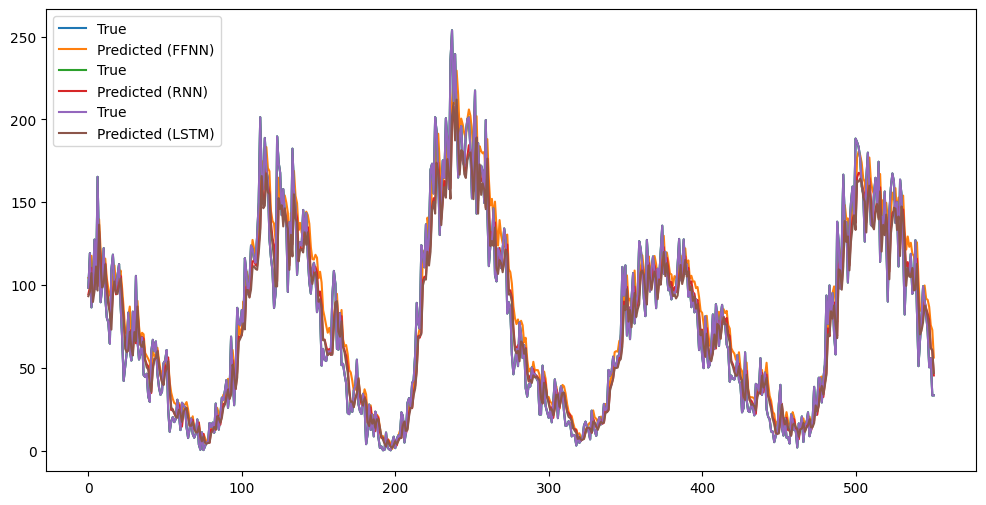

In [5]:

# Entrenar y evaluar los modelos
results = []
for name, model in models:
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((name, mse))

# Imprimir resultados
for name, mse in results:
    print(f'{name}: Mean Squared Error = {mse}')

# Graficar resultados
plt.figure(figsize=(12, 6))
for name, model in models:
    y_pred = model.predict(X_test)
    plt.plot(scaler.inverse_transform(y_test), label='True')
    plt.plot(scaler.inverse_transform(y_pred), label=f'Predicted ({name})')

plt.legend()
plt.show()


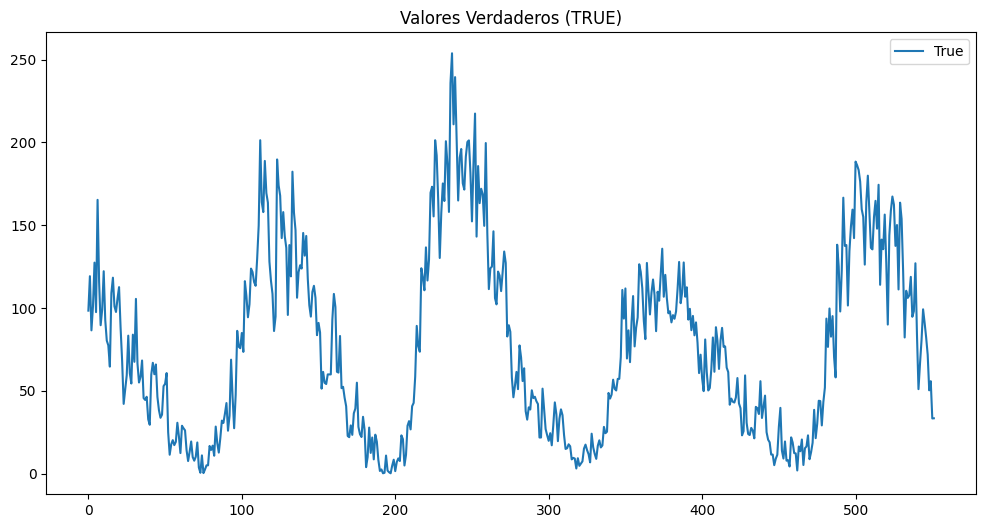

18/18 [==============================] - 0s 6ms/step


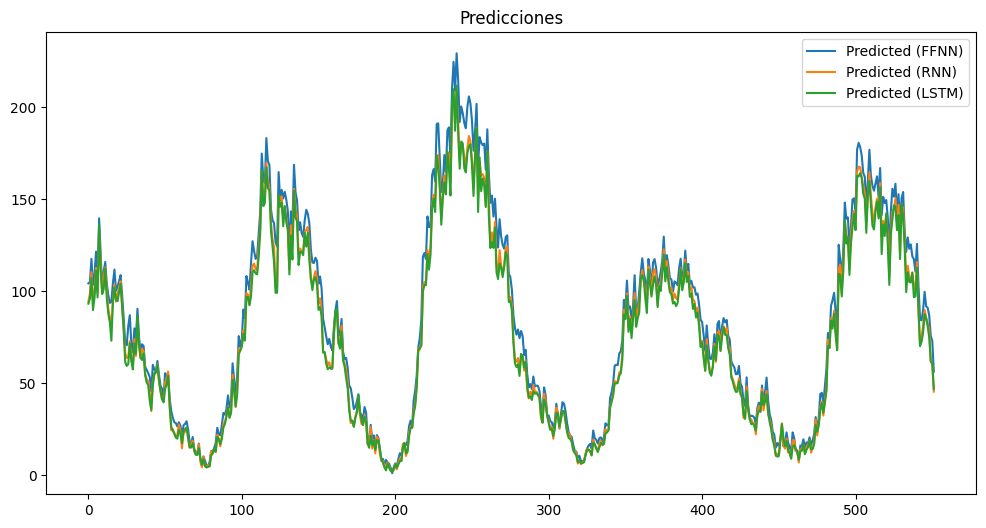

In [6]:
#Graficación más limpia/ordenada
# Graficar valores verdaderos (TRUE)
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.legend()
plt.title('Valores Verdaderos (TRUE)')
plt.show()

# Graficar resultados
plt.figure(figsize=(12, 6))
for name, model in models:
    y_pred = model.predict(X_test)
    plt.plot(scaler.inverse_transform(y_pred), label=f'Predicted ({name})')

plt.legend()
plt.title('Predicciones')
plt.show()

****Discusión de resultados****

Basado en los resultados obtenidos y la teoría revisada en clase, es posibles decir la siguiente información.

**Feed Forward Neural Network (FFNN):**
- *Pros:*
  - Simplicidad: Los FFNN son la arquitectura más simple y fácil de implementar para tareas de regresión.
  - Velocidad de entrenamiento y predicción: Debido a su simplicidad, los FFNN tienden a ser más rápidos en entrenar y predecir en comparación con RNN y LSTM.
- *Contras:*
  - No considera la dependencia temporal: Los FFNN no están diseñados para manejar series de tiempo secuenciales y, por lo tanto, no capturan las dependencias temporales en los datos.

**Recurrent Neural Network (RNN):**
- *Pros:*
  - Modela dependencia temporal: Los RNN están diseñados para trabajar con secuencias y son capaces de modelar dependencias temporales en los datos.
  - Buena elección para datos secuenciales: Son adecuados para problemas de series de tiempo debido a su memoria interna.
- *Contras:*
  - Dificultad en el entrenamiento: Los RNN pueden sufrir de problemas de desvanecimiento o explosión del gradiente, lo que dificulta su entrenamiento.
  - Menos capacidad de memoria a largo plazo: Los RNN pueden tener dificultades para capturar relaciones a largo plazo en los datos de series de tiempo.

**Long Short-Term Memory (LSTM):**
- *Pros:*
  - Manejo de dependencia a largo plazo: Las LSTM están diseñadas para superar el problema de la memoria a corto plazo de los RNN, lo que les permite capturar relaciones a largo plazo en los datos de series de tiempo.
  - Buen rendimiento en series de tiempo: Las LSTM suelen superar a los RNN en problemas de series de tiempo debido a su capacidad de retener información relevante.
- *Contras:*
  - Mayor complejidad: Las LSTM son más complejas que los FFNN y pueden requerir más tiempo y recursos para entrenar y ajustar.

Dada la naturaleza del problema de regresión de series de tiempo de manchas solares y los resultados obtenidos, parece que tanto los RNN como las LSTM funcionan bien, con un MSE similar. Sin embargo, las LSTM tienen la ventaja de poder capturar dependencias a largo plazo en los datos, lo que las hace más adecuadas para problemas de series de tiempo.

Por lo tanto, en este caso, mi elección sería utilizar una Red Neuronal Recurrente (LSTM) debido a su capacidad para modelar dependencias a largo plazo en series de tiempo y su buen rendimiento en este tipo de datos. Sin embargo, es importante destacar que los resultados pueden variar dependiendo de la elección de hiperparámetros, el preprocesamiento de datos y otros factores, por lo que siempre es recomendable experimentar con diferentes arquitecturas y ajustes para obtener el mejor rendimiento posible en un problema específico.